In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

import matplotlib.pyplot as plt
from PIL import Image



In [3]:

# Define the paths
data_dir = 'data'
lesion_dir = os.path.join(data_dir, 'Lesion')
normal_dir = os.path.join(data_dir, 'Normal')

In [4]:
normal_dir

'data\\Normal'

In [5]:
# Load images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        if img is not None:
            images.append((img, img_path))
    return images

lesion_images = load_images_from_folder(lesion_dir)
normal_images = load_images_from_folder(normal_dir)

# Check the number of images in each category
print(f'Number of Lesion images: {len(lesion_images)}')
print(f'Number of Normal images: {len(normal_images)}')



Number of Lesion images: 800
Number of Normal images: 800


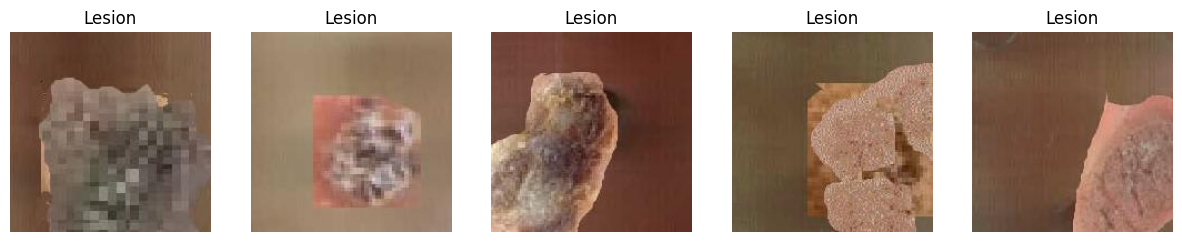

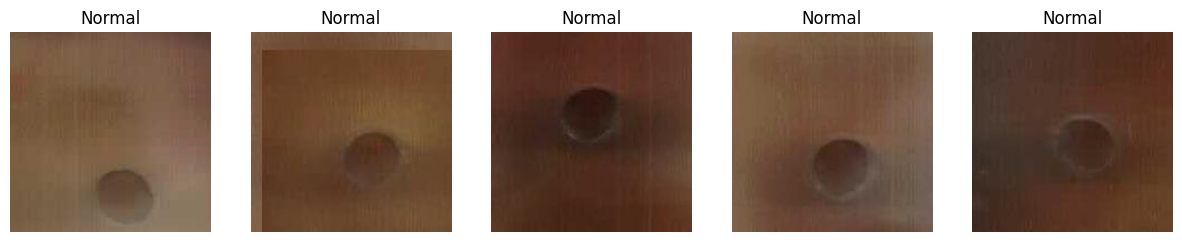

In [6]:
# Display some sample images
def display_sample_images(images, title, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i][0])
        plt.title(title)
        plt.axis('off')
    plt.show()

display_sample_images(lesion_images, 'Lesion')
display_sample_images(normal_images, 'Normal')



In [7]:
# Analyze dimensions and color channels of images
def analyze_image_properties(images, label):
    dimensions = []
    for img, _ in images:
        dimensions.append(img.size + (len(img.getbands()),))
    
    df = pd.DataFrame(dimensions, columns=['Width', 'Height', 'Channels'])
    df['Label'] = label
    return df

lesion_df = analyze_image_properties(lesion_images, 'Lesion')
normal_df = analyze_image_properties(normal_images, 'Normal')



In [9]:
# Combine dataframes
image_properties_df = pd.concat([lesion_df, normal_df], ignore_index=True)

# Display dataframe
print(image_properties_df.head())

   Width  Height  Channels   Label
0    181     181         3  Lesion
1    181     181         3  Lesion
2    181     181         3  Lesion
3    181     181         3  Lesion
4    181     181         3  Lesion


Text(0.5, 1.0, 'Distribution of Image Widths')

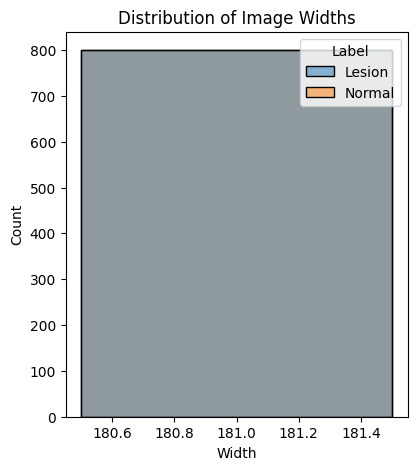

In [10]:

# Plot the distributions
plt.figure(figsize=(15, 5))

# Distribution of image widths
plt.subplot(1, 3, 1)
sns.histplot(data=image_properties_df, x='Width', hue='Label', kde=True)
plt.title('Distribution of Image Widths')






Text(0.5, 1.0, 'Distribution of Image Heights')

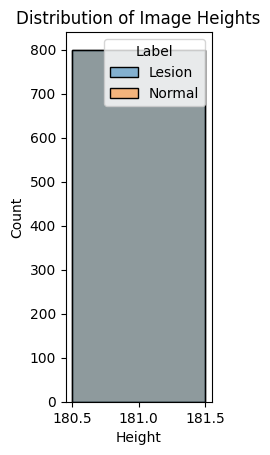

In [11]:
# Distribution of image heights
plt.subplot(1, 3, 2)
sns.histplot(data=image_properties_df, x='Height', hue='Label', kde=True)
plt.title('Distribution of Image Heights')



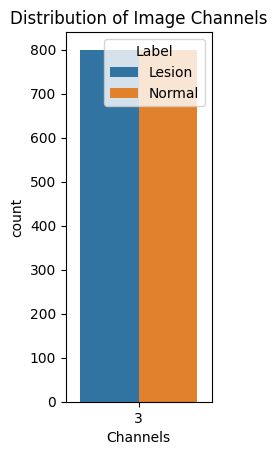

In [12]:
# Distribution of image channels
plt.subplot(1, 3, 3)
sns.countplot(data=image_properties_df, x='Channels', hue='Label')
plt.title('Distribution of Image Channels')

plt.show()